In [1]:
#Author:Vineeth Govind
from __future__ import (absolute_import, division, print_function,
                        unicode_literals) 
import pandas as pd, numpy as np
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#to display output in non scientific format(not exponential)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#2)Read the data as a data frame using pandas

ratings_orginal=pd.read_csv("ratings_Electronics.csv")

#make copy of dataframe with 10th of the data as it runs into memory issues
ratings=ratings_orginal[:782448].copy()

#3)add column names as the dataset has none 

ratings.columns = ["userID","itemID","rating","timestamp"]
print(ratings.head())

           userID      itemID  rating   timestamp
0  A2CX7LUOHB2NDG  0321732944 5.00000  1341100800
1  A2NWSAGRHCP8N5  0439886341 1.00000  1367193600
2  A2WNBOD3WNDNKT  0439886341 3.00000  1374451200
3  A1GI0U4ZRJA8WN  0439886341 1.00000  1334707200
4  A1QGNMC6O1VW39  0511189877 5.00000  1397433600


In [2]:
#4)drop timestamp column

ratings=ratings.drop('timestamp',axis=1)

#4)# Check the number of rows and columns

rows, columns = ratings.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  782448
No of columns:  3


In [3]:
#5)check datatypes

print("data attributes are \n",ratings.dtypes)

data attributes are 
 userID     object
itemID     object
rating    float64
dtype: object


In [4]:
#6)Check for missing values present

print('Number of missing values across columns-\n', ratings.isnull().sum())

Number of missing values across columns-
 userID    0
itemID    0
rating    0
dtype: int64


In [5]:
#there are no missing values

#7)summary of stats of rating columns
print("stats of rating variable \n",ratings["rating"].describe().transpose())

stats of rating variable 
 count   782448.00000
mean         3.98195
std          1.39613
min          1.00000
25%          3.00000
50%          5.00000
75%          5.00000
max          5.00000
Name: rating, dtype: float64


In [6]:
#8) find minimum and maximum ratings
print('The minimum rating is', ratings["rating"].min())
print('The maximum rating is', ratings["rating"].max())

The minimum rating is 1.0
The maximum rating is 5.0


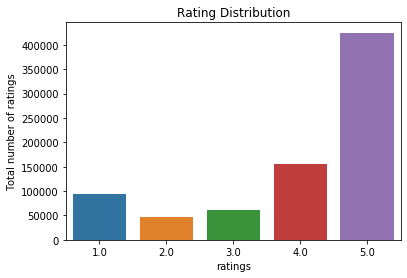

In [7]:
#The minimum rating is 1 and maximum rating is 5.

#9)plot the distribution of ratings

rating_plot = sns.countplot("rating", data=ratings)
rating_plot.set(xlabel='ratings', ylabel='Total number of ratings') 
plt.title('Rating Distribution')
plt.show()

In [8]:
#10) Top 50 users based on rating

most_rated = ratings.groupby('userID').size().sort_values(ascending=False)[:50]
print("most rated users are \n", most_rated)

most rated users are 
 userID
A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
AKT8TGIT6VVZ5     108
A11D1KHM7DVOQK    106
A2B7BUH8834Y6M     98
A2AEZQ3DGBBLPR     81
A2R6RA8FRBS608     79
AGHZXQL9F94T9      74
A203OCQQ12MAVT     73
A1MJMYLRTZ76ZX     68
A1F9Z42CFF9IAY     68
A3OXHLG6DIBRW8     67
A149RNR5RH19YY     65
A12DLJESJKM1OQ     64
A1FR68QH6Z4YZM     64
A1JWSDDIH5Z7DV     64
ABH9D1TEOJ56E      64
A2CL818RN52NWN     59
A1RPTVW5VEOSI      58
A7Y6AVS576M03      58
AT2J7H5TRZM8Z      57
A2BGZ52M908MJY     54
A2AY4YUOX2N1BQ     50
AGXV8E7XK9J6H      50
AWPODHOB4GFWL      49
A680RUE1FDO8B      49
A2XRMQA6PJ5ZJ8     48
ALUNVOQRXOZIA      47
A1ODOGXEYECQQ8     46
A38QEATH3NODFM     45
A1VQHH85U7PX0      45
A1435P5AMCPB3X     44
A1KD8NJPZ01R37     44
A8TZ88OM8YOLW      43
A2PSD2R9A1CXG7     43
A32QOZWIKQDNZX     40
AD0J5KK4WQXNS      39
A3NCIN6TNL0MGA     39
A4WEZJOIZIV4U      39
A1JUBRIZMO0RJV     38
A3OA4DV4L81N1D     38
A2

In [9]:
#11)For more accurate results only consider users who have rated atleast 50 items
#(MAKING THE MATRIX MORE DENSE)

counts=ratings["rating"].value_counts()
counts = pd.value_counts(ratings['userID'])
print(counts)
ratings_df = ratings[ratings["userID"].isin(counts[counts >= 50].index)]

print('Number of users who have rated 50 or more items =',len(ratings_df))
print('Number of unique USERS in final data = ', ratings_df['userID'].nunique())
print('Number of unique ITEMS in final data = ', ratings_df['userID'].nunique())

A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
                 ... 
A1XFM2OV19O60N      1
A39YHB6O29AY88      1
A2FGKT5RL674KV      1
A1AYBZ9CJ297J5      1
A3HZV9RGI727WH      1
Name: userID, Length: 606149, dtype: int64
Number of users who have rated 50 or more items = 2550
Number of unique USERS in final data =  27
Number of unique ITEMS in final data =  27


In [10]:
#12)creating a rating matrix using pivot function and fill NANS with zero

final_ratings =ratings_df.pivot(index = 'userID', columns ='itemID', values = 'rating').fillna(0)
print(final_ratings.T)

userID      A11D1KHM7DVOQK  A12DLJESJKM1OQ  A149RNR5RH19YY  A1F9Z42CFF9IAY  \
itemID                                                                       
1400532655         0.00000         0.00000         0.00000         0.00000   
B000000O48         0.00000         0.00000         0.00000         0.00000   
B000001OL6         0.00000         0.00000         0.00000         0.00000   
B000001OMN         2.00000         0.00000         0.00000         0.00000   
B00000J05A         0.00000         0.00000         0.00000         0.00000   
...                    ...             ...             ...             ...   
B000BSOBG0         0.00000         0.00000         0.00000         0.00000   
B000BTFZZA         0.00000         0.00000         0.00000         0.00000   
B000BTL0OA         0.00000         0.00000         5.00000         0.00000   
B000BTPVHW         0.00000         0.00000         0.00000         0.00000   
B000BTQXUG         0.00000         0.00000         0.00000      

In [11]:
#13)calculate density of matrix

given_num_of_ratings = np.count_nonzero(final_ratings)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings.shape[0] * final_ratings.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)*100
print ('density of matrix is ',density)

given_num_of_ratings =  2550
possible_num_of_ratings =  59589
density of matrix is  4.2793132960781355


In [12]:
#the matrix has a low density 

#14)#Split the training and test data in the ratio 70:30

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings_df, test_size = 0.3, random_state=0)
print(train_data.head())
print("train date shape is ",train_data.shape)
print("test data shape is ",test_data.shape)

                userID      itemID  rating
397256   A5JLAU2ARJ0BO  B0001I2EZK 5.00000
565825   AGHZXQL9F94T9  B0006HTPQ2 5.00000
168430  A231WM2Z2JL0U3  B00006B1HC 5.00000
471345  A1F9Z42CFF9IAY  B0002ILKMW 3.00000
732782  A3OXHLG6DIBRW8  B000B5H2BE 4.00000
train date shape is  (1785, 3)
test data shape is  (765, 3)


In [13]:
#15)Build popularity based recommendation system

#Count of userID for each unique product as recommendation score 
train_data_grouped = train_data.groupby('itemID').agg({'userID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)
print(train_data_grouped.head())

       itemID  score
0  1400532655      1
1  B000001OL6      1
2  B000001OMN      1
3  B00000J061      1
4  B00000J1E6      1


In [14]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'itemID'], ascending = False) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
print(popularity_recommendations) 

          itemID  score    Rank
81    B00004SB92      5 1.00000
902   B00009R6TA      4 2.00000
708   B00007KDVI      4 3.00000
1594  B000BKJZ9Q      3 4.00000
1563  B000AJIF4E      3 5.00000


In [15]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 


find_recom = [7,21,79]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation using popularity based recommender for the userID: %d\n " %(i))
    print(recommend(i))    
    print("\n") 
    

Here is the recommendation using popularity based recommender for the userID: 7
 
      userID      itemID  score    Rank
81         7  B00004SB92      5 1.00000
902        7  B00009R6TA      4 2.00000
708        7  B00007KDVI      4 3.00000
1594       7  B000BKJZ9Q      3 4.00000
1563       7  B000AJIF4E      3 5.00000


Here is the recommendation using popularity based recommender for the userID: 21
 
      userID      itemID  score    Rank
81        21  B00004SB92      5 1.00000
902       21  B00009R6TA      4 2.00000
708       21  B00007KDVI      4 3.00000
1594      21  B000BKJZ9Q      3 4.00000
1563      21  B000AJIF4E      3 5.00000


Here is the recommendation using popularity based recommender for the userID: 79
 
      userID      itemID  score    Rank
81        79  B00004SB92      5 1.00000
902       79  B00009R6TA      4 2.00000
708       79  B00007KDVI      4 3.00000
1594      79  B000BKJZ9Q      3 4.00000
1563      79  B000AJIF4E      3 5.00000




In [16]:
    
#16)collabrative filering recommendation system
#USER BASED COLLABRATIVE FILTERING

from surprise import Reader  
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split,GridSearchCV
from surprise import Dataset
                          
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[["userID", "itemID", "rating"]], reader)                        
trainset, testset = train_test_split(data, test_size=.30)                                               

# now test on the trainset                                                 
 
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

# run the trained model against the testset
test_pred = algo.test(testset)

# run the trained model against the testset
test_pred = algo.test(testset)
#print(test_pred)

# get RMSE

print("accuracy of user based collaborative filtering is ",accuracy.rmse(test_pred, verbose=True) )

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1796
accuracy of user based collaborative filtering is  1.1796163141284002


In [17]:
# we can now query for specific predicions
uid ="A231WM2Z2JL0U3"  # raw user id
iid = "B00009R6TA"  # raw item id

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=0, verbose=True)
print(pred)

user: A231WM2Z2JL0U3 item: B00009R6TA r_ui = 0.00   est = 4.67   {'actual_k': 0, 'was_impossible': False}
user: A231WM2Z2JL0U3 item: B00009R6TA r_ui = 0.00   est = 4.67   {'actual_k': 0, 'was_impossible': False}


In [20]:
#generating top 5 predictions for userid "A231WM2Z2JL0U3"
pred = pd.DataFrame(test_pred)
print("top 5 recommended products for userid A231WM2Z2JL0U3 by user based collabrative filtering recommender are \n",pred[pred['uid'] == "A231WM2Z2JL0U3"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)) 
    

top 5 recommended products for userid A231WM2Z2JL0U3 by user based collabrative filtering recommender are 
             iid    r_ui     est
764  B00005T3TL 5.00000 4.15798
233  B000063SGW 5.00000 4.15798
511  B000021YUO 5.00000 5.00000
241  B00005MAAR 5.00000 4.15798
244  B00004Y2MM 5.00000 5.00000


In [21]:
   
#using svd  

from surprise import SVDpp
from surprise import SVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

sv = SVD(n_factors=5,biased=False)   
sv.fit(trainset)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Use the new parameters with the train data
algo = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
algo.fit(trainset)
test_pred_svd = algo.test(testset)

print("accuracy using SVD IS accuracy",accuracy.rmse(test_pred_svd, verbose=True))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2978  1.2332  1.1480  1.1883  1.2954  1.2325  0.0588  
MAE (testset)     0.9655  0.9452  0.8991  0.9156  0.9886  0.9428  0.0325  
Fit time          0.21    0.20    0.23    0.20    0.23    0.21    0.01    
Test time         0.02    0.01    0.01    0.01    0.

In [22]:
pred = pd.DataFrame(test_pred)
print("top 5 recommended products for userid A231WM2Z2JL0U3 by SVD recommender are \n",pred[pred['uid'] == "A231WM2Z2JL0U3"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5))

top 5 recommended products for userid A231WM2Z2JL0U3 by SVD recommender are 
             iid    r_ui     est
764  B00005T3TL 5.00000 4.15798
233  B000063SGW 5.00000 4.15798
511  B000021YUO 5.00000 5.00000
241  B00005MAAR 5.00000 4.15798
244  B00004Y2MM 5.00000 5.00000


In [ ]:
#INSIGHTS
#1)THE TIMESTAMP COLUMN CAN BE DROPPED AS IT PROVIDES NO INFORMATION FOR THE RECOMMENDER SYSTEM OR ANY SORT OF PREDICTIONS
#2)THE COUNTPLOT SHOWS THAT MAJORITY OF USERS HAVE GIVEN A RATING OF 5 ,FOLLOWED BY RATING OF 4.THE RATING GIVEN BY LEAST NUMBER USERS IS 2
#3)ALTHOUGH THERE WERE NO MISING VALUES,THE DENSITY OF THE MATRIX IS 4.279 WHICH SHOWS THAT IT A VERY SPARSE MATRIX 
#4)SINCE THE DATA WAS HUGE WITH AROUND 7.8 MILLION COLUMNS THE PYTHON COMPILER RAN INTO MEMORY ISSUES.SO A SMALLER SUBSET(10%) OF THE DATA WAS USED
#5)A POPULARIY BASED SYSTEM WHICH IS THE MOST BASIC RECOMMENDATION SYSTEM WAS BUILT AND USED TO RECOMMEND ITEMS FOR USERS.
#6) THE MAIN PROBLEM WITH POPULARITY BASED RECOMMENDATION SYSTEM IS THAT THE PERSONALIZATION IS NOT AVAILABLE WITH THIS METHOD 
#I.E. EVEN THOUGH YOU KNOW THE BEHAVIOUR OF THE USER YOU CANNOT RECOMMEND ITEMS ACCORDINGLY.
#7)A USER BASED COLLABRATIVE FILTERING RECOMMENDER WAS BUILT AND USED TO RECOMMEND 5 NEW PRODUCTS FOR A USER AND IT HAD A RMSE SCORE OF 1.211
#8)MATRIX FACTORIZATION TECHNIQUES(SVD) ARE USUALLY MORE EFFECTIVE BECAUSE THEY ALLOW US TO DISCOVER THE LATENT FEATURES UNDERLYING 
#THE INTERACTIONS BETWEEN USERS AND ITEMS.
#9)A RECOMMENDER SYSTEM USING SVD WAS BUILT.THOUGH THE SVD AND COLLABRATIVE FILTERING RECOMMENDERS RECOMMENDEDED 
#THE SAME 5 ITEMS FOR A USER,THE RMSE SCORE  OF SVD WAS LOWER(1.05) HENCE SUGGESTING IT PERFORMED BETTER THAN COLLABRATIVE FILTERING RECOMMENDER
                                                                 
                                                                      
                                                                      
                                                                      
                                                                      
                                                                      
                                                                      